In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [4]:
#kütüphaneleri yükle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
#Veri dosyasını yükle
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [9]:
#Veri ön işleme ve EDA
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
#veriseti hakkında bilgi
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
#eksik veri kontrolü
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [13]:
#veri ön işleme işlemleri yapılacağı için test ve train birleştirilir
df=pd.concat([df_train,df_test],ignore_index=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [14]:
#satır sütun sayısı
df_train.shape,df_test.shape,df.shape #ilk 891 i train, son 418 i test

((891, 12), (418, 11), (1309, 12))

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
#numeric özellikler
numeric_columns=df.select_dtypes(include=['number'])
numeric_columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,NaN,0,0,8.0500
1305,1306,NaN,1,39.0,0,0,108.9000
1306,1307,NaN,3,38.5,0,0,7.2500
1307,1308,NaN,3,NaN,0,0,8.0500


In [17]:
# Her çalışmada anlamlı çıkacak diye bir kural
numeric_columns.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


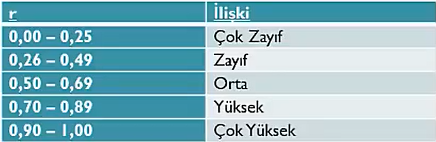

<Axes: xlabel='Pclass', ylabel='count'>

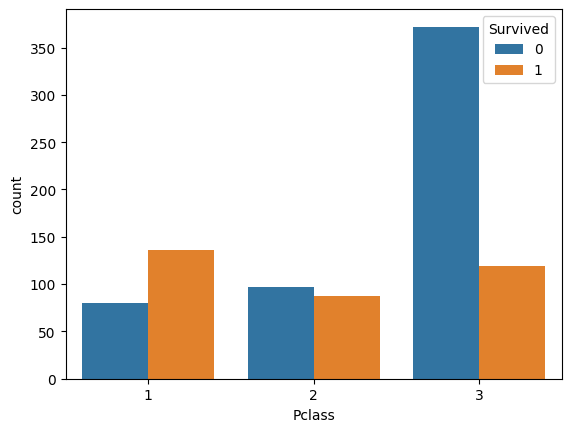

In [19]:
sns.countplot(x="Pclass", hue="Survived",data=df_train)

<Axes: xlabel='Survived', ylabel='count'>

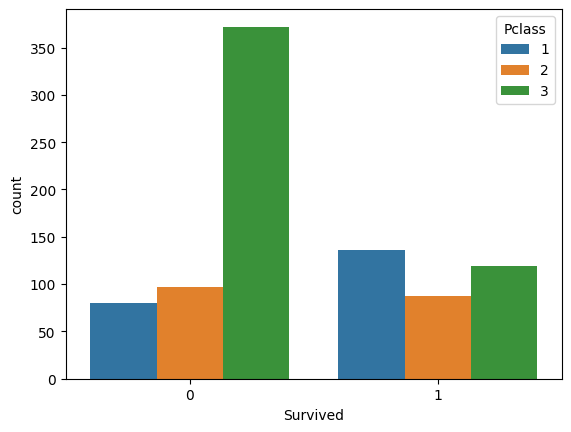

In [20]:
sns.countplot(x="Survived", hue="Pclass",data=df_train)

In [21]:
#Name sütunu
df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [22]:
#Unvanları alalım
df['Title']=df['Name'].str.extract('([A-Za-z]+)\.')

In [23]:
#hangi unvanlar var
df['Title'].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [24]:
#Fransızca veya diğer dillerdeki ünvanları uygn şekilde çevirdik
df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss')
df['Title']=df['Title'].replace(['Mme','Countess','Lady','Dona'],'Mrs')
df['Title']=df['Title'].replace(['Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer'],'Mr')

In [25]:
df['Title'].value_counts()

Title
Mr        783
Miss      264
Mrs       201
Master     61
Name: count, dtype: int64

In [26]:
#Embarked eksik verileri doldur
#en çok tekrar eden değeri kullan
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True) #df['Embarked'].mode()[0] birden fazla mod olabilir o yüzden ilkini al
df['Embarked'].isnull().sum()

0

In [27]:
df['Age'].isnull().sum()

263

In [28]:
#Yaş değerlerini doldur
df['Age'].fillna(df.groupby('Title')['Age'].transform('mean'),inplace=True) # unvanların yaş ortalamalarına göre eksik yaşları doldur
df['Age'].isnull().sum()

0

In [29]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
Title             0
dtype: int64

In [30]:
# Bilet ücreti
df['Fare'].mean()

33.29547928134557

In [31]:
df['Fare'].median()

14.4542

In [32]:
df['Fare'].fillna(df['Fare'].median(),inplace=True)
#df['Fare'].fillna(df['Fare'].mean(),inplace=True)

In [33]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Title             0
dtype: int64

In [34]:
df['Fare'].median()

14.4542

In [35]:
df['Fare'].fillna(df['Fare'].median(),inplace=True)
#df['Fare'].fillna(df['Fare'].mean(),inplace=True)

In [36]:
#Özellikler ve hedef değişkenkerini belirle
y=df['Survived']
X=df.drop(['Survived','PassengerId','Name', 'Ticket','Cabin'],axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,22.0,1,0,7.2500,S,Mr
1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,female,26.0,0,0,7.9250,S,Miss
3,1,female,35.0,1,0,53.1000,S,Mrs
4,3,male,35.0,0,0,8.0500,S,Mr


In [37]:
y

0       0.0
1       1.0
2       1.0
3       1.0
4       0.0
       ... 
1304    NaN
1305    NaN
1306    NaN
1307    NaN
1308    NaN
Name: Survived, Length: 1309, dtype: float64

In [38]:
#Kategorik verileri sayısal verilere çevirir
#One Hot Encoding
X=pd.get_dummies(X,drop_first=True) #Feature Engineering özellik mühendisliği
#Pclass aslında sayısal bir veri değil önce dtype objeye çevireceksiniz sonra dummies yapacaksınız

In [39]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [40]:
#Train ve testi aşağıdaki gibi ayırıyoruz
X_train=X[:891] #Train veri setinde ilk 891
X_test=X[891:]
y_train=y[:891]
y_test=y[891:]

In [41]:
#Tahminlerin gerçek değerleri yarışmalarda bizden gizlenir
y_test

891    NaN
892    NaN
893    NaN
894    NaN
895    NaN
        ..
1304   NaN
1305   NaN
1306   NaN
1307   NaN
1308   NaN
Name: Survived, Length: 418, dtype: float64

In [42]:
#Model Kütüphaneleri
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import BernoulliNB
#metrikler
from sklearn.model_selection import cross_val_score
#accuaracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [45]:
def model_classification(X,y):
    '''
    X: independent variable
    y: dependent variable
    return best model and its accuracy
    '''
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
    models = [GaussianNB(),BernoulliNB(),LogisticRegression(),RandomForestClassifier(), 
              GradientBoostingClassifier(), KNeighborsClassifier(n_neighbors=5)]
    results=[]
    for model in models:
        model.fit(x_train,y_train)
        model_predict=model.predict(x_test)
        print("Model: ",model)
        print("Model Accuracy: ",accuracy_score(model_predict,y_test))
        print("Model Confusion Matrix: ",confusion_matrix(model_predict,y_test),"\n")
        print("Model Classification Report: ",classification_report(model_predict,y_test))
        print("-"*50)
        results.append(accuracy_score(model_predict,y_test))
    #best model
    best_model=models[results.index(max(results))]
    print("Best Model: ",best_model)
    print("Best Model Accuracy: ",max(results))
    models=pd.DataFrame({
        'Model':['GaussianNB','BernoulliNB','LogisticRegression','RandomForestClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier'],
        'Score':results})
    print(models.sort_values(by='Score', ascending=False, ignore_index=True))
    return best_model,max(results), confusion_matrix(model_predict,y_test)

In [46]:
model_classification(X_train,y_train)

Model:  GaussianNB()
Model Accuracy:  0.7947761194029851
Model Confusion Matrix:  [[132  30]
 [ 25  81]] 

Model Classification Report:                precision    recall  f1-score   support

         0.0       0.84      0.81      0.83       162
         1.0       0.73      0.76      0.75       106

    accuracy                           0.79       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.79      0.80       268

--------------------------------------------------
Model:  BernoulliNB()
Model Accuracy:  0.7947761194029851
Model Confusion Matrix:  [[134  32]
 [ 23  79]] 

Model Classification Report:                precision    recall  f1-score   support

         0.0       0.85      0.81      0.83       166
         1.0       0.71      0.77      0.74       102

    accuracy                           0.79       268
   macro avg       0.78      0.79      0.79       268
weighted avg       0.80      0.79      0.80       268

--------------------

(GradientBoostingClassifier(),
 0.8246268656716418,
 array([[130,  50],
        [ 27,  61]]))

In [47]:
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)# Testi kaggle üzeirnden yapacağımız için artık veri setini bölmeden elimizdeki tüm veri setini gönderiyoruz.
y_pred=gb.predict(X_test)
y_pred

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [48]:
#from all_class import all_classification_models

In [49]:
submission = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': y_pred.astype(int)})
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [50]:
submission.to_csv('submission.csv', index=False) #data frame i csv dosyası oalrak kaydediyor